In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.datasets import mnist
from keras import layers

## Improving Model Fit 
There are this kinds of problems you can face when trying to fit a problem to a model

1. Training doesn't get started: your training loss does not go down 
2. Training starts but the model does not meaningfully predict values and cannot beat the metrics (baseline) you decide for random classifier 
3. Training and validation loss keep going down and we cannot seem to overfit the model to get a point where we need to stop training. 

### Problem 1 - Tuning the gradient descent
In the first problem you should tinker with the learning rate or batch size used for training and gradient descent to make training rate go down. 

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),  # just too much learning rate 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# due to the large learning rate 1.0 we can see that the accuracy and loss are both stand still

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 927.8696 - accuracy: 0.3262 - val_loss: 2.0895 - val_accuracy: 0.2468
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8464 - accuracy: 0.2275 - val_loss: 2.1864 - val_accuracy: 0.2110
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8098 - accuracy: 0.2179 - val_loss: 2.2713 - val_accuracy: 0.1664
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3579 - accuracy: 0.2062 - val_loss: 2.2027 - val_accuracy: 0.2037
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7499 - accuracy: 0.2333 - val_loss: 2.2303 - val_accuracy: 0.2522
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5999 - accuracy: 0.2364 - val_loss: 2.1125 - val_accuracy: 0.2407
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6563 - accuracy: 0.2415 - val_loss: 2.2685 - val_accuracy: 0.2048
Epoc

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),  # just too much learning rate 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# here the loss starts to go down. 

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.9118 - val_loss: 0.1423 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1246 - accuracy: 0.9648 - val_loss: 0.1243 - val_accuracy: 0.9659
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9740 - val_loss: 0.1203 - val_accuracy: 0.9728
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9795 - val_loss: 0.1538 - val_accuracy: 0.9662
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9814 - val_loss: 0.1867 - val_accuracy: 0.9685
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9855 - val_loss: 0.1669 - val_accuracy: 0.9736
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9865 - val_loss: 0.1895 - val_accuracy: 0.9731
Epoch 

### Problem 3 - Here both earlier problems do not occur
Here we loss go down as well as accuracy metrics are met and you can beat them. However the model will just not overfit. This is also something that you will face and you make have to change the architecture layers (increase them) or choose a better model

In the example that follows we model a simple logistic regression (classification) for a problem set and see the validation loss not overfit inspite of increase in epochs. 

In [12]:
lr_model = keras.Sequential([layers.Dense(10, activation="softmax")])
lr_model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
hist_small_model= lr_model.fit(train_images, train_labels,
                            epochs=20,
                            batch_size=128,
                            validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 761us/step - loss: 0.6749 - accuracy: 0.8329 - val_loss: 0.3610 - val_accuracy: 0.9022
Epoch 2/20
375/375 [==============================] - 0s 639us/step - loss: 0.3521 - accuracy: 0.9023 - val_loss: 0.3070 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 0s 674us/step - loss: 0.3158 - accuracy: 0.9121 - val_loss: 0.2891 - val_accuracy: 0.9185
Epoch 4/20
375/375 [==============================] - 0s 659us/step - loss: 0.2993 - accuracy: 0.9163 - val_loss: 0.2800 - val_accuracy: 0.9211
Epoch 5/20
375/375 [==============================] - 0s 678us/step - loss: 0.2898 - accuracy: 0.9187 - val_loss: 0.2752 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 0s 655us/step - loss: 0.2825 - accuracy: 0.9211 - val_loss: 0.2736 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 0s 682us/step - loss: 0.2780 - accuracy: 0.9229 - val_loss: 0.2712 - val_accuracy:

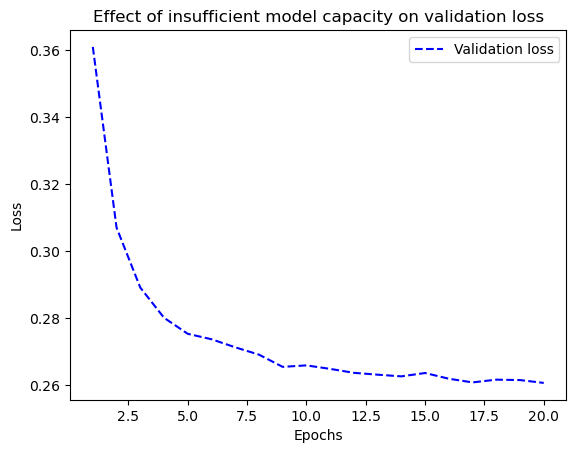

In [14]:
import matplotlib.pyplot as plt
val_loss = hist_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
# now if we make the model more dense
mdlr_model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
    
    ])
mdlr_model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
hist_small_model= mdlr_model.fit(train_images, train_labels,
                            epochs=20,
                            batch_size=128,
                            validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3593 - accuracy: 0.8990 - val_loss: 0.1847 - val_accuracy: 0.9460
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9516 - val_loss: 0.1445 - val_accuracy: 0.9546
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9661 - val_loss: 0.1146 - val_accuracy: 0.9656
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9740 - val_loss: 0.1156 - val_accuracy: 0.9651
Epoch 5/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.0948 - val_accuracy: 0.9738
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.1029 - val_accuracy: 0.9696
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0951 - val_accuracy: 0.9733
Epoch 

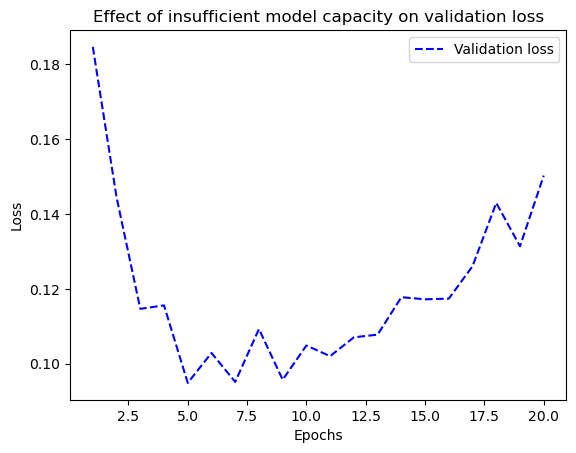

In [17]:
val_loss = hist_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

here we get the validation loss - overfitting achieved. 